In [1]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinu

Check CUDA version and GPU

In [2]:
!nvcc --version
!nvidia-smi

zsh:1: command not found: nvcc
Mon Jul 22 20:45:27 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:2B:00.0  On |                  N/A |
|  0%   51C    P3             26W /  170W |     557MiB /  12288MiB |      9%      Default |
|                                         |                        |                  N/A |
+----------------

In [ ]:
!pip install scikit-image
!pip install matplotlib

import libraries and check GPU (the first time you import cellpose the models will download).

In [3]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse;
from cellpose import models, core

use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

# call logger_setup to have output of cellpose written
from cellpose.io import logger_setup
logger_setup();


>>> GPU activated? 1
2024-07-22 20:45:35,193 [INFO] WRITING LOG OUTPUT TO /home/duardo/.cellpose/run.log
2024-07-22 20:45:35,194 [INFO] 
cellpose version: 	3.0.10 
platform:       	linux 
python version: 	3.12.4 
torch version:  	2.3.1+cu121


['soja5/Pic_2023_09_03_203956_3887.tiff', 'imaturos4/Pic_2023_09_03_192825_2216.tiff', 'queimados4/Pic_2023_09_03_194852_2598.tiff', 'bandinhas2/Pic_2023_09_03_193544_2334.tiff', 'ardidos4/Pic_2023_09_03_183043_1439.tiff', 'chochos3/Pic_2023_09_03_185530_1738.tiff', 'mofados3/Pic_2023_09_03_195752_2779.tiff', 'ardidos3/Pic_2023_09_03_182408_1384.tiff', 'ardidos5/Pic_2023_09_03_184327_1579.tiff', 'bandinhas5/Pic_2023_09_03_194013_2422.tiff', 'purpuras3/Pic_2023_09_03_201203_3325.tiff', 'bandinhas3/Pic_2023_09_03_193714_2356.tiff', 'fermentados1/Pic_2023_09_03_191152_1913.tiff', 'imaturos1/Pic_2023_09_03_192425_2091.tiff', 'fermentados5/Pic_2023_09_03_192048_2034.tiff', 'mofados4/Pic_2023_09_03_195915_2788.tiff', 'soja4/Pic_2023_09_03_203706_3826.tiff', 'bandinhas4/Pic_2023_09_03_193855_2410.tiff', 'ardidos2/Pic_2023_09_03_182319_1343.tiff', 'queimados2/Pic_2023_09_03_194533_2548.tiff', 'soja1/Pic_2023_09_03_203025_3734.tiff', 'mofados1/Pic_2023_09_03_195459_2688.tiff', 'chochos5/Pic_202

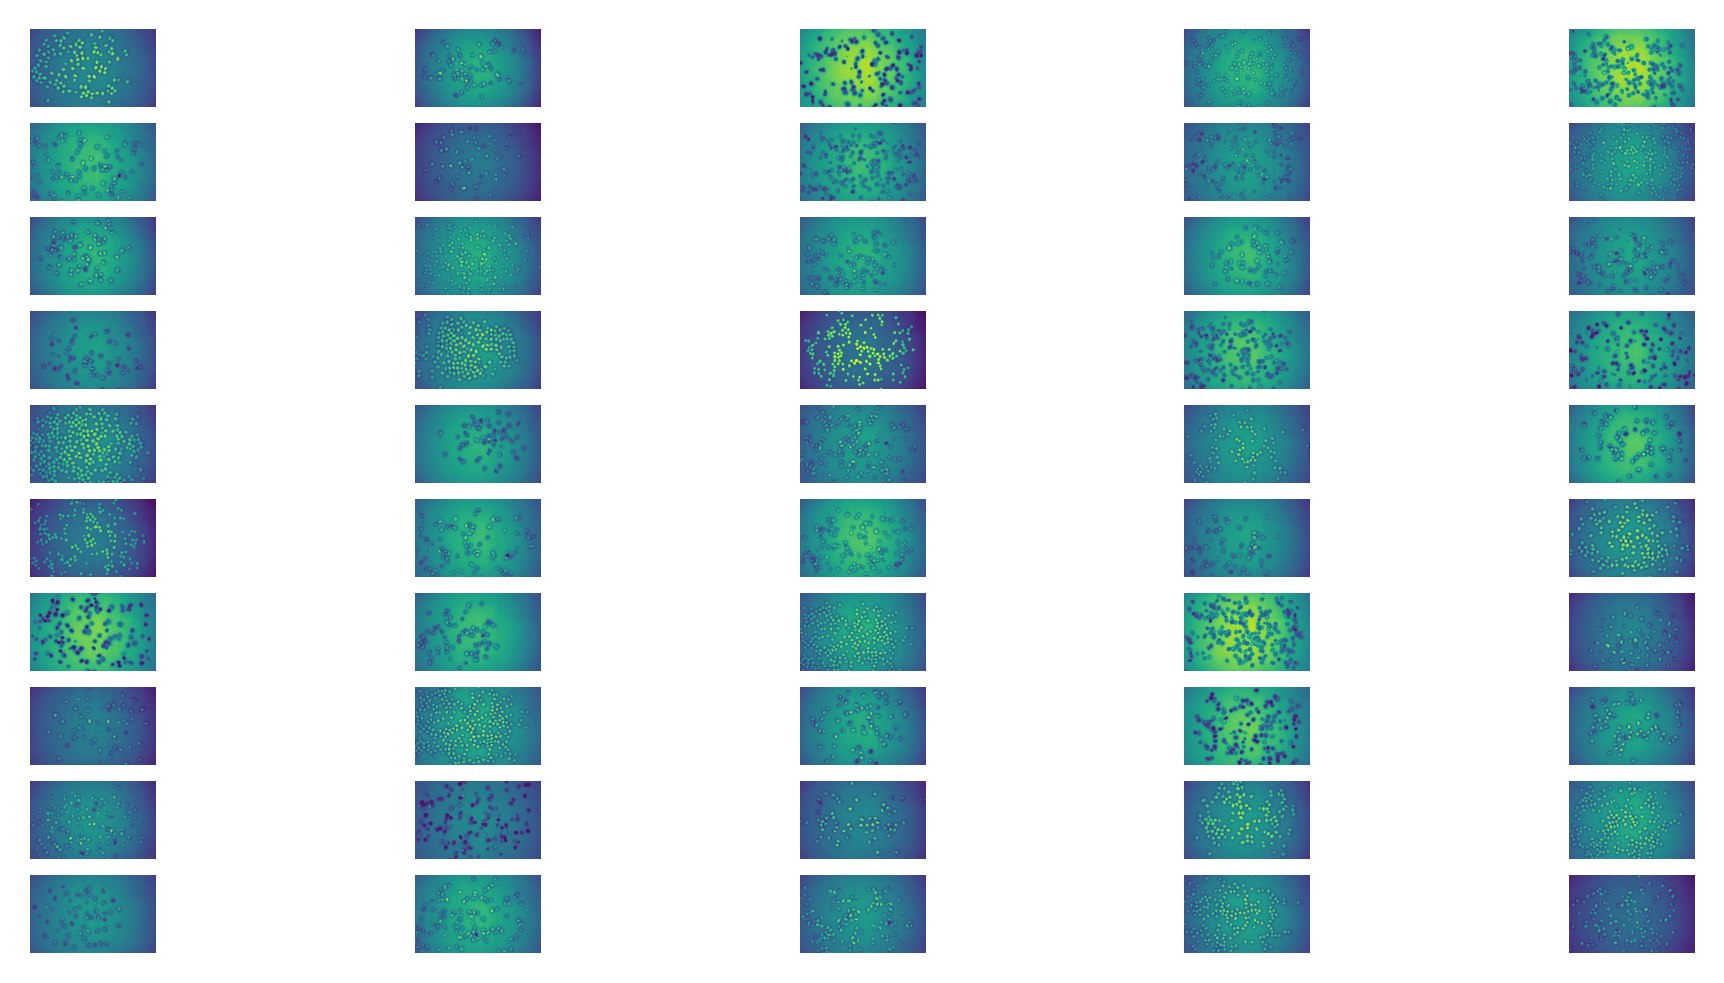

In [7]:
from cellpose import utils
import random

image_folder_path = 'soja'

files = []
folders = os.listdir(image_folder_path)

for folder in folders:
  folder_path = os.path.join(image_folder_path, folder)
  _files = sorted(os.listdir(folder_path))
  _files = [f for f in _files[2:] if f.endswith('.tiff')] # remove first two files

  if _files:
    selected_file = random.choice(_files)
    files.append(os.path.join(folder, selected_file))

# files = files[:10]
print(files)
print(len(files))

imgs = [skimage.io.imread(os.path.join(image_folder_path, f)) for f in files]
nimg = len(imgs)


plt.figure(figsize=(8,4))
for k,img in enumerate(imgs):
   plt.subplot(10, 5 ,k+1)
   plt.axis('off')
   plt.imshow(img)
plt.savefig("amostras")

In [8]:
imgs_2D = imgs

from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=use_GPU, model_type='cyto3')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [0,0]
# channels = [1,1]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs_2D, diameter=60, flow_threshold=None, channels=channels)

2024-07-22 20:47:14,348 [INFO] ** TORCH CUDA version installed and working. **
2024-07-22 20:47:14,349 [INFO] >>>> using GPU
2024-07-22 20:47:14,350 [INFO] >> cyto3 << model set to be used
2024-07-22 20:47:14,397 [INFO] >>>> loading model /home/duardo/.cellpose/models/cyto3
2024-07-22 20:47:14,460 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2024-07-22 20:47:14,461 [INFO] channels set to [0, 0]
2024-07-22 20:47:14,462 [INFO] ~~~ FINDING MASKS ~~~
2024-07-22 20:47:47,633 [INFO] 100%|##########| 50/50 [00:33<00:00,  1.51it/s]
2024-07-22 20:47:47,633 [INFO] >>>> TOTAL TIME 33.17 sec


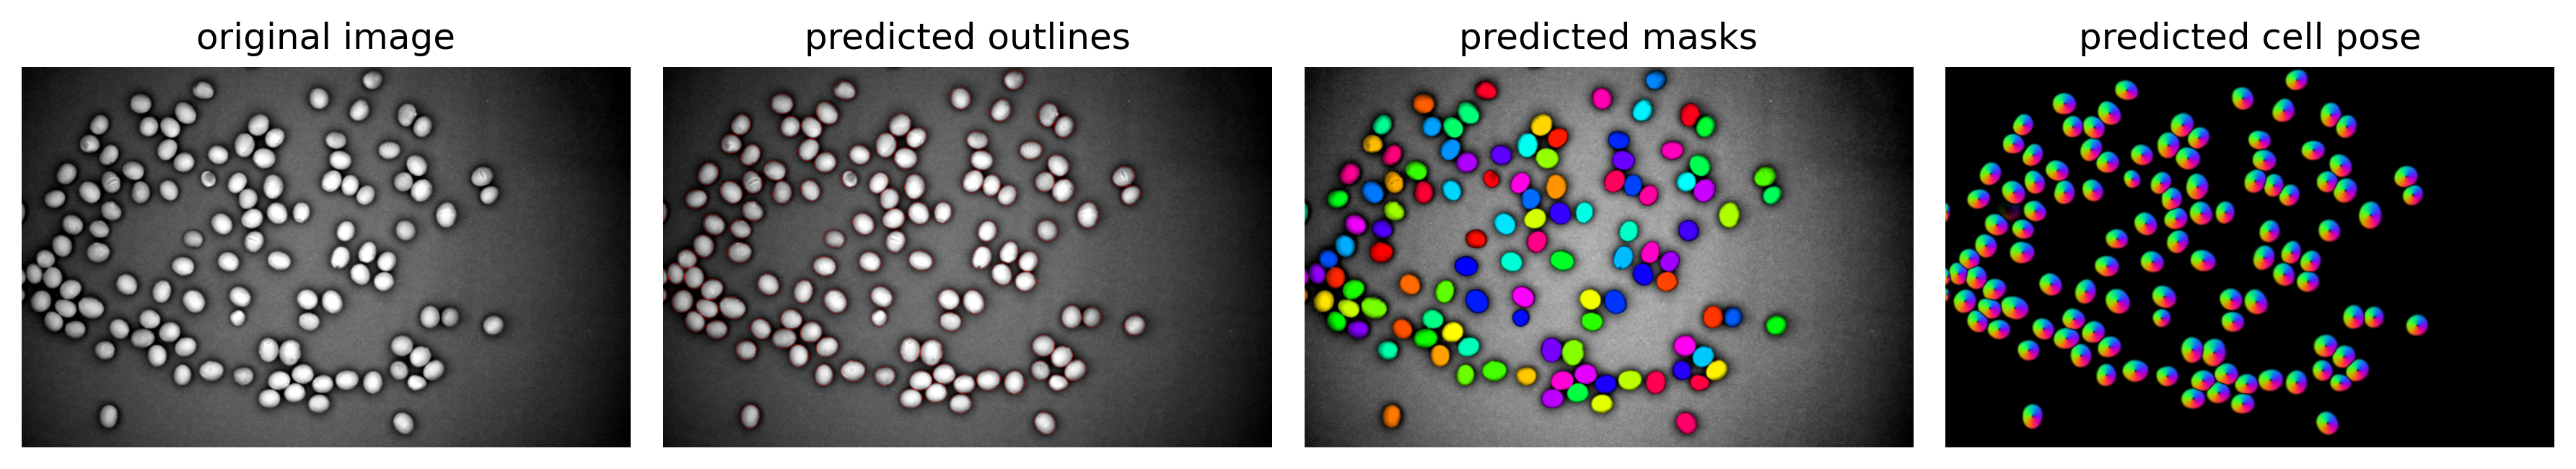

<Figure size 1920x1440 with 0 Axes>

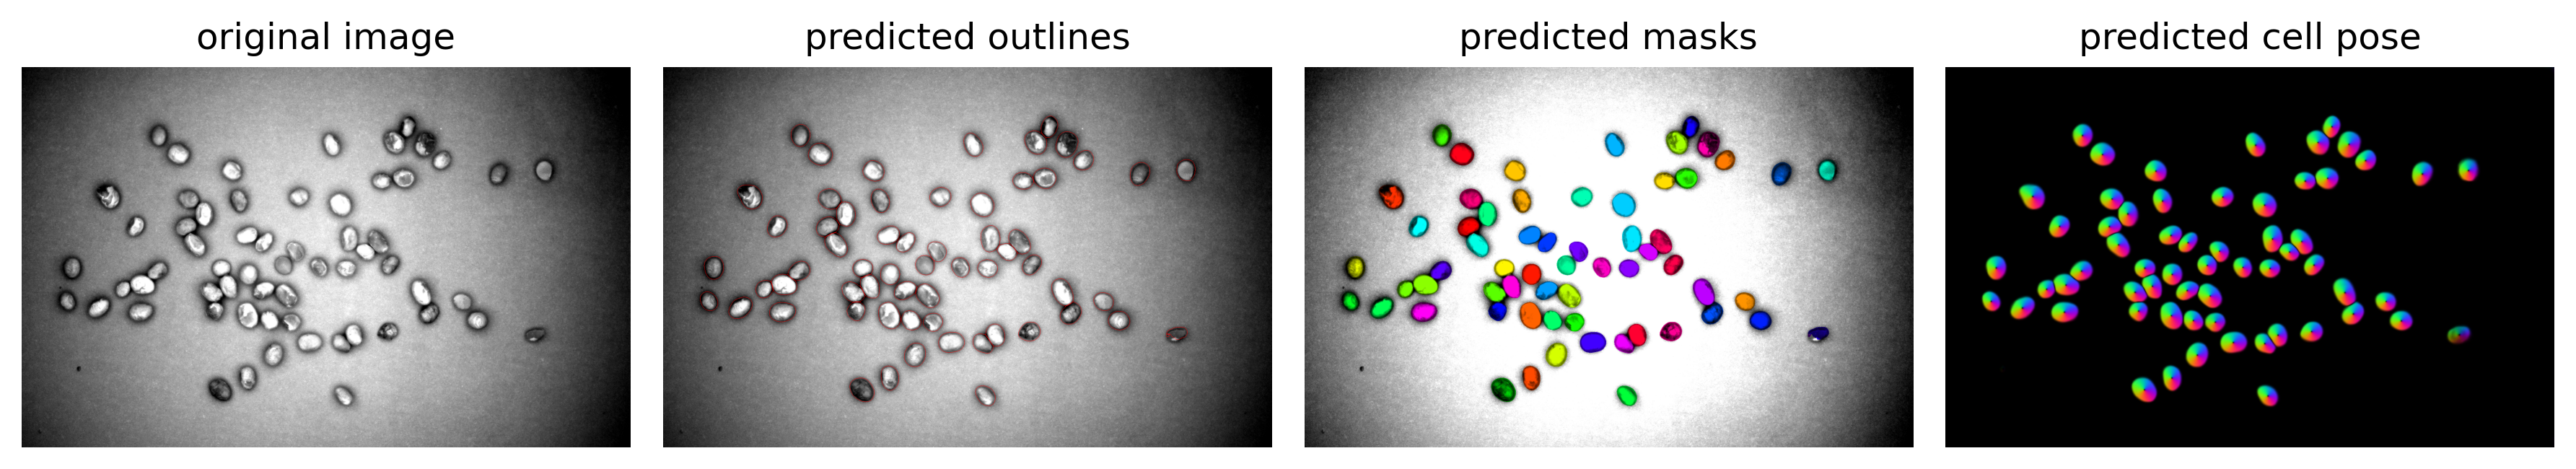

<Figure size 1920x1440 with 0 Axes>

In [9]:
from cellpose import plot

nimg = len(imgs_2D)
for idx in range(2):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels)
    plt.tight_layout()
    plt.show()

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

nimg = len(imgs_2D)

for idx in range(nimg):
  file = files[idx]
  label = file.split('/')[0]
  img = imgs[idx]

  imgs_folder = os.path.join(image_folder_path, label)
  print(f'percorrendo {label}')

  _files = sorted(os.listdir(imgs_folder))
  _files = [f for f in _files[2:] if f.endswith('.tiff')] # remove first two files 

  list_imgs = _files
  maski = masks[idx]

  maski_uint8 = maski.astype(np.uint8)

  kernel = np.ones((3,3), np.uint8)
  opened_masks = cv2.morphologyEx(maski_uint8, cv2.MORPH_OPEN, kernel, iterations=2)
  dist_transform = cv2.distanceTransform(opened_masks, cv2.DIST_L2, 5)
  ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
  sure_fg = np.uint8(sure_fg)
  sure_bg = cv2.dilate(opened_masks, kernel, iterations=3)
  unknown = cv2.subtract(sure_bg, sure_fg)
  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers + 1
  markers[unknown == 255] = 0
  img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  markers = cv2.watershed(img_color, markers)
  img_color[markers == -1] = [0, 0, 255]

  contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
  crop_size = 64

  cropped_images = []
  i = 0
  for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cx, cy = x + w // 2, y + h // 2  # Centro do contorno
        half_size = crop_size // 2

        # Garantir que os recortes estejam dentro dos limites da imagem original
        start_x = max(0, cx - half_size)
        end_x = min(img.shape[1], cx + half_size)
        start_y = max(0, cy - half_size)
        end_y = min(img.shape[0], cy + half_size)
        j = 0
        for f in list_imgs:
          img = skimage.io.imread(os.path.join(imgs_folder, f))
          cropped_image = img[start_y:end_y, start_x:end_x]

          if cropped_image.shape[0] == crop_size and cropped_image.shape[1] == crop_size:
              output_filename = f"label_{i}_{j}.tiff"
              j += 1
              os.makedirs(os.path.join('_recortado', label), exist_ok=True)
              output_path = os.path.join('_recortado', label, output_filename)

              cv2.imwrite(output_path, cropped_image)
              #cropped_images.append(cropped_image)
        i += 1



percorrendo soja5
percorrendo imaturos4
percorrendo queimados4
percorrendo bandinhas2
percorrendo ardidos4
percorrendo chochos3
percorrendo mofados3
percorrendo ardidos3
percorrendo ardidos5
percorrendo bandinhas5
percorrendo purpuras3
percorrendo bandinhas3
percorrendo fermentados1
percorrendo imaturos1
percorrendo fermentados5
percorrendo mofados4
percorrendo soja4
percorrendo bandinhas4
percorrendo ardidos2
percorrendo queimados2
percorrendo soja1
percorrendo mofados1
percorrendo chochos5
percorrendo soja_b4
percorrendo purpuras5
percorrendo bandinhas1
percorrendo chochos1
percorrendo fermentados2
percorrendo imaturos5
percorrendo soja2
percorrendo queimados5
percorrendo imaturos2
percorrendo soja_b1
percorrendo ardidos1
percorrendo imaturos3
percorrendo mofados2
percorrendo soja_b2
percorrendo purpuras2
percorrendo queimados1
percorrendo purpuras4
percorrendo fermentados4
percorrendo queimados3
percorrendo purpuras1
percorrendo soja3
percorrendo soja_b3
percorrendo mofados5
percorr